# 선형회귀분석 실습 4: 실전

## 모듈 불러오기

In [0]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf

import pylab

from sklearn.model_selection import train_test_split

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#plt.rc('font', family='Malgun Gothic')

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

## 데이터 불러오기

### Toyota Corolla Data
### 중고차 가격(Price)를 예측하기 위한 예측모델 학습

In [25]:
from google.colab import drive
drive.mount('/content/gdrive/')
import os
os.chdir('/content/gdrive/My Drive/Colab Notebooks')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [26]:
data = pd.read_csv('WEEK_4_Data/ToyotaCorolla.csv')
data.head()

Id                                           Model  ...  Radio_cassette  Tow_Bar
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  ...               0        0
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  ...               0        0
2   3  ?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  ...               0        0
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  ...               0        0
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  ...               0        0

[5 rows x 37 columns]

## 데이터 전처리하기
### 1. 예측에 필요하지 않은 변수 제거

In [27]:
data = data.drop(['Id', 'Model', 'Fuel_Type'], axis=1)
data.head()

Price  Age_08_04  Mfg_Month  ...  Metallic_Rim  Radio_cassette  Tow_Bar
0  13500         23         10  ...             0               0        0
1  13750         23         10  ...             0               0        0
2  13950         24          9  ...             0               0        0
3  14950         26          7  ...             0               0        0
4  13750         30          3  ...             0               0        0

[5 rows x 34 columns]

### 2. 학습 데이터와 테스트 데이터로 분리

In [0]:
train_data, test_data = train_test_split(data, test_size=0.3, random_state=55)

## 모델링

### 학습 데이터를 이용하여 선형회귀모델 학습

In [0]:
lm = sm.OLS(train_data['Price'], train_data.drop('Price', axis=1))
lm_trained = lm.fit()

### 모델 학습 결과 (Summary) 확인

In [30]:
lm_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     375.5
Date:                Sun, 06 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:02:34   Log-Likelihood:                -8436.6
No. Observations:                1005   AIC:                         1.694e+04
Df Residuals:                     974   BIC:                         1.709e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age_08_04         -114.9816      4.017    -28.624      0.000    -122.865    -107.099
Mfg_Month          -93.2776     10.543     -8.848      0.000    -113.966     -72.589
Mfg_Year            -2.1563      0.848     -2.542      0.011      -3.821      -0.492
KM                  -0.0191      0.001    -15.524      0.000      -0.021      -0.017
HP                  18.5371      2.843      6.519      0.000      12.957      24.117
Met_Color         -103.0730     79.112     -1.303      0.193    -258.322      52.176
Automatic          195.8010    148.789      1.316      0.188     -96.183     487.785
cc                  -0.1373      0.076     -1.803      0.072      -0.287       0.012
Doors              -15.6624     41.785     -0.375      0.708     -97.662      66.337
Cylinders           -0.0389      0.002    -17.095      0.000      -0.043      -0.034
Gears              204.1533    187.482      1.089      0.276    -163.762     572.069
Quarterly_Tax        1.3659      1.478      0.924      0.356      -1.535       4.267
Weight              18.8386      1.431     13.165      0.000      16.030      21.647
Mfr_Guarantee      312.9440     77.283      4.049      0.000     161.283     464.605
BOVAG_Guarantee    679.1090    131.481      5.165      0.000     421.090     937.128
Guarantee_Period    76.7554     13.590      5.648      0.000      50.086     103.425
ABS               -414.1815    131.349     -3.153      0.002    -671.942    -156.421
Airbag_1          -325.9419    249.517     -1.306      0.192    -815.595     163.711
Airbag_2           161.7414    135.909      1.190      0.234    -104.967     428.450
Airco               85.6836     92.377      0.928      0.354     -95.598     266.965
Automatic_airco   2148.0897    193.528     11.100      0.000    1768.310    2527.870
Boardcomputer     -375.3768    123.072     -3.050      0.002    -616.893    -133.861
CD_Player          277.0970    104.093      2.662      0.008      72.825     481.369
Central_Lock      -246.8519    143.376     -1.722      0.085    -528.214      34.510
Powered_Windows    663.8474    143.354      4.631      0.000     382.530     945.165
Power_Steering    -397.8024    288.134     -1.381      0.168    -963.237     167.632
Radio              -47.4025     53.746     -0.882      0.378    -152.875      58.070
Mistlamps          -45.0181    114.003     -0.395      0.693    -268.738     178.702
Sport_Model        210.4336     91.325      2.304      0.021      31.217     389.650
Backseat_Divider   -85.2049    128.238     -0.664      0.507    -336.860     166.450
Metallic_Rim       236.9277     97.772      2.423      0.016      45.059     428.797
Radio_cassette     -47.4025     53.746     -0.882      0.378    -152.875      58.070
Tow_Bar           -100.1751     83.535     -1.199      0.231    -264.104      63.753
=======================

## 예측성능 평가

### 1. 학습 데이터셋에 대한 예측성능 평가
MSE, RMSE, MAE, MAPE 계산하여 성능 확인

In [31]:
train_pred = lm_trained.predict(train_data.drop(['Price'], axis=1))

print('Training MSE: {:.3f}'.format(mean_squared_error(train_data['Price'], train_pred)))

Training MSE: 1145614.264


### 2. 테스트 데이터셋에 대한 예측성능 평가
MSE, RMSE, MAE, MAPE 계산하여 성능 확인

In [32]:
test_pred = lm_trained.predict(test_data.drop(['Price'], axis=1))

print('Testing MSE: {:.3f}'.format(mean_squared_error(test_data['Price'], test_pred)))

Testing MSE: 1788162.286


## 변수 선택

### 1-1. 선형회귀모델에서 유의하지 않은 변수가 있다면 제거

In [33]:
not_significants = lm_trained.pvalues.index[lm_trained.pvalues > 0.1]
print(not_significants)

Index(['Met_Color', 'Automatic', 'Doors', 'Gears', 'Quarterly_Tax', 'Airbag_1',
       'Airbag_2', 'Airco', 'Power_Steering', 'Radio', 'Mistlamps',
       'Backseat_Divider', 'Radio_cassette', 'Tow_Bar'],
      dtype='object')


In [0]:
train_data_new = train_data.drop(not_significants, axis=1)
test_data_new = test_data.drop(not_significants, axis=1)

### 1-2. 변수 제거 후 모델 학습 결과 확인

In [36]:
lm_new = sm.OLS(train_data_new['Price'], train_data_new.drop('Price', axis=1))
lm_new_trained = lm_new.fit()
lm_new_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     656.7
Date:                Sun, 06 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:14:15   Log-Likelihood:                -8446.9
No. Observations:                1005   AIC:                         1.693e+04
Df Residuals:                     987   BIC:                         1.702e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age_08_04         -115.7983      3.792    -30.535      0.000    -123.240    -108.356
Mfg_Month          -91.1476     10.493     -8.687      0.000    -111.739     -70.556
Mfg_Year            -2.2407      0.558     -4.014      0.000      -3.336      -1.145
KM                  -0.0189      0.001    -15.881      0.000      -0.021      -0.017
HP                  17.5231      2.521      6.952      0.000      12.577      22.470
cc                  -0.1187      0.076     -1.572      0.116      -0.267       0.029
Cylinders           -0.0389      0.002    -20.176      0.000      -0.043      -0.035
Weight              19.4291      0.937     20.744      0.000      17.591      21.267
Mfr_Guarantee      304.2482     74.899      4.062      0.000     157.269     451.228
BOVAG_Guarantee    645.8841    123.735      5.220      0.000     403.071     888.697
Guarantee_Period    75.3204     12.561      5.997      0.000      50.672      99.969
ABS               -368.1645    101.956     -3.611      0.000    -568.240    -168.089
Automatic_airco   2182.3780    178.458     12.229      0.000    1832.178    2532.578
Boardcomputer     -355.1598    119.352     -2.976      0.003    -589.373    -120.947
CD_Player          264.9530    100.175      2.645      0.008      68.372     461.534
Central_Lock      -285.4946    140.418     -2.033      0.042    -561.048      -9.942
Powered_Windows    663.0870    140.049      4.735      0.000     388.259     937.915
Sport_Model        233.2431     81.104      2.876      0.004      74.087     392.400
Metallic_Rim       266.0088     91.039      2.922      0.004      87.357     444.661
==============================================================================
Omnibus:                       41.709   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.110
Skew:                          -0.002   Prob(JB):                     3.05e-27
Kurtosis:                       4.708   Cond. No.                     7.30e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.15e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 1-3. 변수 제거 후 모델 예측성능 (학습/테스트) 확인

In [37]:
train_pred_new = lm_new_trained.predict(train_data_new.drop(['Price'], axis=1))

print('Training MSE: {:.3f}'.format(mean_squared_error(train_data_new['Price'], train_pred_new)))

Training MSE: 1169297.095


In [38]:
test_pred_new = lm_new_trained.predict(test_data_new.drop(['Price'], axis=1))

print('Testing MSE: {:.3f}'.format(mean_squared_error(test_data_new['Price'], test_pred_new)))

Testing MSE: 1766823.322


### 2-1. 상관계수가 높은 설명변수들이 있다면 하나의 변수만 선택

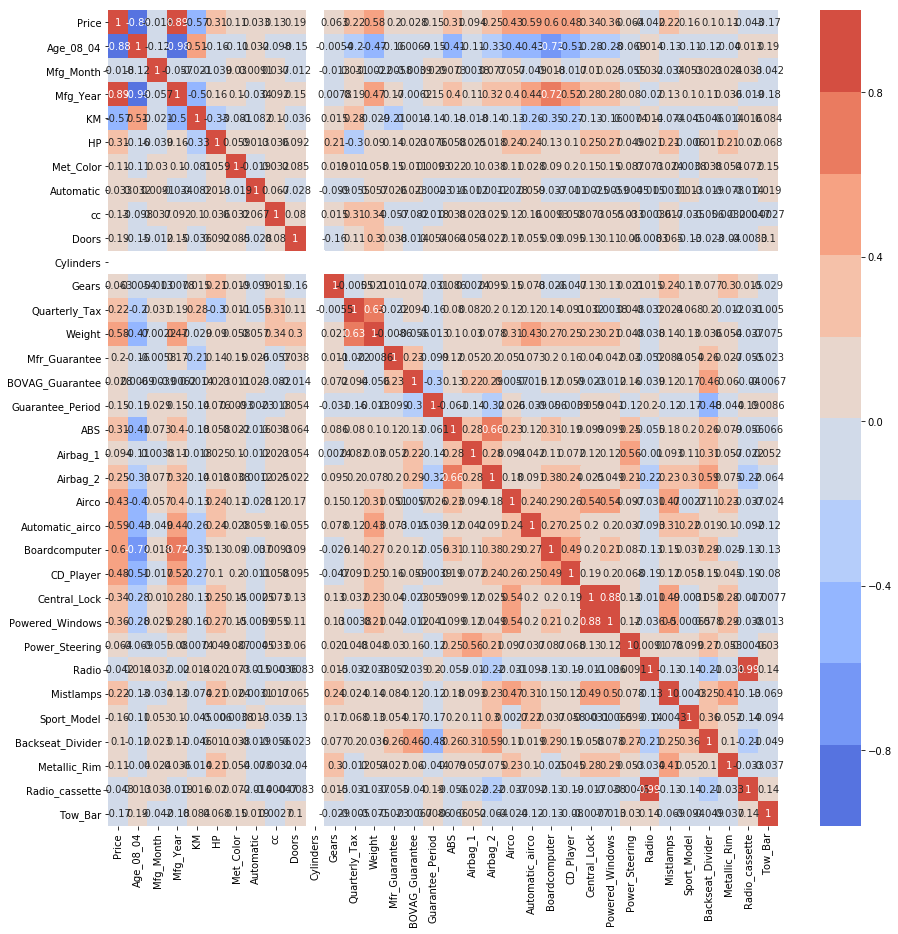

In [47]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), cmap=sns.color_palette("coolwarm", 10), annot=data.corr())

In [0]:
train_data_new2 = train_data.drop(['Radio_cassette', 'Central_Lock'], axis=1)
test_data_new2 = test_data.drop(['Radio_cassette', 'Central_Lock'], axis=1)

### 2-2. 변수 제거 후 모델 학습 결과 확인

In [41]:
lm_new2 = sm.OLS(train_data_new2['Price'], train_data_new2.drop('Price', axis=1))
lm_new2_trained = lm_new2.fit()
lm_new2_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     387.5
Date:                Sun, 06 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:15:04   Log-Likelihood:                -8438.2
No. Observations:                1005   AIC:                         1.694e+04
Df Residuals:                     975   BIC:                         1.708e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age_08_04         -114.7619      4.019    -28.554      0.000    -122.649    -106.875
Mfg_Month          -92.3139     10.538     -8.760      0.000    -112.994     -71.634
Mfg_Year            -2.1090      0.849     -2.485      0.013      -3.774      -0.443
KM                  -0.0192      0.001    -15.654      0.000      -0.022      -0.017
HP                  18.4267      2.846      6.475      0.000      12.842      24.011
Met_Color         -110.1621     79.084     -1.393      0.164    -265.356      45.032
Automatic          191.4768    148.918      1.286      0.199    -100.759     483.713
cc                  -0.1397      0.076     -1.833      0.067      -0.289       0.010
Doors              -16.4879     41.824     -0.394      0.694     -98.564      65.588
Cylinders           -0.0386      0.002    -16.997      0.000      -0.043      -0.034
Gears              206.1380    187.667      1.098      0.272    -162.140     574.416
Quarterly_Tax        1.4010      1.480      0.947      0.344      -1.503       4.305
Weight              18.7388      1.431     13.092      0.000      15.930      21.548
Mfr_Guarantee      310.0280     77.342      4.009      0.000     158.251     461.805
BOVAG_Guarantee    685.2745    131.565      5.209      0.000     427.092     943.457
Guarantee_Period    76.1008     13.599      5.596      0.000      49.415     102.787
ABS               -422.8376    131.385     -3.218      0.001    -680.668    -165.007
Airbag_1          -319.4328    249.740     -1.279      0.201    -809.522     170.656
Airbag_2           184.2561    135.415      1.361      0.174     -81.482     449.994
Airco               73.4842     92.198      0.797      0.426    -107.445     254.414
Automatic_airco   2168.5593    193.357     11.215      0.000    1789.115    2548.003
Boardcomputer     -377.4997    123.189     -3.064      0.002    -619.246    -135.753
CD_Player          267.5889    104.051      2.572      0.010      63.400     471.778
Powered_Windows    477.1401     93.851      5.084      0.000     292.966     661.314
Power_Steering    -419.5494    288.147     -1.456      0.146    -985.008     145.910
Radio             -105.2503    107.429     -0.980      0.327    -316.070     105.569
Mistlamps          -72.1788    113.020     -0.639      0.523    -293.969     149.612
Sport_Model        205.6127     91.374      2.250      0.025      26.300     384.925
Backseat_Divider   -89.2073    128.346     -0.695      0.487    -341.074     162.660
Metallic_Rim       235.3976     97.867      2.405      0.016      43.344     427.451
Tow_Bar            -99.6176     83.618     -1.191      0.234    -263.710      64.474
==============================================================================
Omnibus:                       43.573   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.0

### 2-3. 변수 제거 후 모델 예측성능 (학습/테스트) 확인

In [42]:
train_pred_new2 = lm_new2_trained.predict(train_data_new2.drop(['Price'], axis=1))

print('Training MSE: {:.3f}'.format(mean_squared_error(train_data_new2['Price'], train_pred_new2)))

Training MSE: 1149100.837


In [43]:
test_pred_new2 = lm_new2_trained.predict(test_data_new2.drop(['Price'], axis=1))

print('Testing MSE: {:.3f}'.format(mean_squared_error(test_data_new2['Price'], test_pred_new2)))

Testing MSE: 1772686.434


## 변수 변환

### 반응변수($\mathbf{y}$)에 로그 / 제곱근 등의 변환 적용하고 모델 성능 확인

In [44]:
train_data_new3 = train_data.copy()
test_data_new3 = test_data.copy()

train_data_new3['Price'] = np.log(train_data_new3['Price'].values)

lm_new3 = sm.OLS(train_data_new3['Price'], train_data_new3.drop('Price', axis=1))
lm_new3_trained = lm_new3.fit()
display(lm_new3_trained.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     267.8
Date:                Sun, 06 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:15:19   Log-Likelihood:                 889.58
No. Observations:                1005   AIC:                            -1717.
Df Residuals:                     974   BIC:                            -1565.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age_08_04           -0.0092      0.000    -24.637      0.000      -0.010      -0.008
Mfg_Month           -0.0061      0.001     -6.157      0.000      -0.008      -0.004
Mfg_Year             0.0043   7.91e-05     54.583      0.000       0.004       0.004
KM               -1.873e-06   1.15e-07    -16.334      0.000    -2.1e-06   -1.65e-06
HP                   0.0015      0.000      5.781      0.000       0.001       0.002
Met_Color           -0.0132      0.007     -1.782      0.075      -0.028       0.001
Automatic            0.0438      0.014      3.153      0.002       0.017       0.071
cc               -8.389e-07    7.1e-06     -0.118      0.906   -1.48e-05    1.31e-05
Doors                0.0075      0.004      1.920      0.055      -0.000       0.015
Cylinders         6.076e-06   2.12e-07     28.602      0.000    5.66e-06    6.49e-06
Gears                0.0445      0.017      2.546      0.011       0.010       0.079
Quarterly_Tax        0.0005      0.000      3.332      0.001       0.000       0.001
Weight               0.0007      0.000      5.482      0.000       0.000       0.001
Mfr_Guarantee        0.0354      0.007      4.908      0.000       0.021       0.050
BOVAG_Guarantee      0.0590      0.012      4.814      0.000       0.035       0.083
Guarantee_Period     0.0058      0.001      4.597      0.000       0.003       0.008
ABS                 -0.0154      0.012     -1.255      0.210      -0.039       0.009
Airbag_1            -0.0289      0.023     -1.243      0.214      -0.075       0.017
Airbag_2             0.0099      0.013      0.780      0.435      -0.015       0.035
Airco                0.0195      0.009      2.264      0.024       0.003       0.036
Automatic_airco      0.0908      0.018      5.029      0.000       0.055       0.126
Boardcomputer       -0.0158      0.011     -1.378      0.168      -0.038       0.007
CD_Player            0.0222      0.010      2.286      0.022       0.003       0.041
Central_Lock        -0.0214      0.013     -1.601      0.110      -0.048       0.005
Powered_Windows      0.0603      0.013      4.507      0.000       0.034       0.087
Power_Steering      -0.0468      0.027     -1.740      0.082      -0.100       0.006
Radio               -0.0017      0.005     -0.333      0.739      -0.012       0.008
Mistlamps            0.0086      0.011      0.805      0.421      -0.012       0.029
Sport_Model         -0.0015      0.009     -0.173      0.863      -0.018       0.015
Backseat_Divider     0.0025      0.012      0.206      0.837      -0.021       0.026
Metallic_Rim         0.0078      0.009      0.855      0.393      -0.010       0.026
Radio_cassette      -0.0017      0.005     -0.333      0.739      -0.012       0.008
Tow_Bar             -0.0068      0.008     -0.874      0.382      -0.022       0.008
=======================

In [45]:
test_pred_new3 = lm_new3_trained.predict(test_data_new3.drop(['Price'], axis=1))
test_pred_new3 = np.exp(test_pred_new3)

print('Testing MSE: {:.3f}'.format(mean_squared_error(test_data_new3['Price'], test_pred_new3)))

Testing MSE: 1335848.310


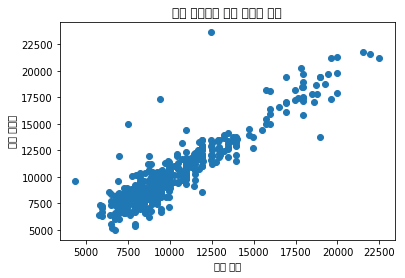

In [67]:
plt.scatter(test_data['Price'], test_pred)
plt.xlabel(u"실제 집값")
plt.ylabel(u"집값 예측치")
plt.title("집값 예측치와 실제 집값의 관계")
plt.show()